In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [3]:
# Kaggle Kernel-dependent
input_path = "/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/"

In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(input_path + 'train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(input_path + 'validation', data_transforms['validation']),
    'test': 
    datasets.ImageFolder(input_path + 'test', data_transforms['test'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),  
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0),  
    'test':
    torch.utils.data.DataLoader(image_datasets['test'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)  
}

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [6]:
model = models.resnet50(pretrained=True).to(device)
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [8]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
    return model

In [ ]:
model_trained = train_model(model, criterion, optimizer, num_epochs=30)

Epoch 1/3
----------
train loss: 0.5335, acc: 0.7325
validation loss: 0.6661, acc: 0.6143
Epoch 2/3
----------
train loss: 0.4209, acc: 0.8151
validation loss: 0.7229, acc: 0.6238
Epoch 3/3
----------
train loss: 0.4134, acc: 0.8021
validation loss: 0.7809, acc: 0.6214


In [ ]:

!mkdir models
!mkdir models/pytorch

In [ ]:
torch.save(model_trained.state_dict(), '/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights.h5')

In [9]:
model = models.resnet101(weights=None).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights.h5'), strict=False)

_IncompatibleKeys(missing_keys=['layer3.6.conv1.weight', 'layer3.6.bn1.weight', 'layer3.6.bn1.bias', 'layer3.6.bn1.running_mean', 'layer3.6.bn1.running_var', 'layer3.6.conv2.weight', 'layer3.6.bn2.weight', 'layer3.6.bn2.bias', 'layer3.6.bn2.running_mean', 'layer3.6.bn2.running_var', 'layer3.6.conv3.weight', 'layer3.6.bn3.weight', 'layer3.6.bn3.bias', 'layer3.6.bn3.running_mean', 'layer3.6.bn3.running_var', 'layer3.7.conv1.weight', 'layer3.7.bn1.weight', 'layer3.7.bn1.bias', 'layer3.7.bn1.running_mean', 'layer3.7.bn1.running_var', 'layer3.7.conv2.weight', 'layer3.7.bn2.weight', 'layer3.7.bn2.bias', 'layer3.7.bn2.running_mean', 'layer3.7.bn2.running_var', 'layer3.7.conv3.weight', 'layer3.7.bn3.weight', 'layer3.7.bn3.bias', 'layer3.7.bn3.running_mean', 'layer3.7.bn3.running_var', 'layer3.8.conv1.weight', 'layer3.8.bn1.weight', 'layer3.8.bn1.bias', 'layer3.8.bn1.running_mean', 'layer3.8.bn1.running_var', 'layer3.8.conv2.weight', 'layer3.8.bn2.weight', 'layer3.8.bn2.bias', 'layer3.8.bn2.run

In [12]:
import os
test_mon= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Monkeypox")
print(test_mon)
test_oth= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Others")
print(test_oth)
classes = os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test")
print(classes)

['M43_02.jpg', 'M40_02.jpg', 'M39_01.jpg', 'M40_03.jpg', 'M19_01.jpg', 'M45_01.jpg', 'M48_01.jpg', 'M38_02.jpg', 'M43_03.jpg', 'M39_02.jpg', 'M48_02.jpg', 'M43_01.jpg', 'M04_01.jpg', 'M40_01.jpg', 'M38_01.jpg', 'M23_01.jpg', 'M19_02.jpg', 'M51_02.jpg', 'M51_01.jpg', 'M48_03.jpg']
['NM67_01.jpg', 'NM54_02.jpg', 'NM101_01.jpg', 'NM58_02.jpg', 'NM54_01.jpg', 'NM79_01.jpg', 'NM41_02.jpg', 'NM14_01.jpg', 'NM101_02.jpg', 'NM19_01.jpg', 'NM41_01.jpg', 'NM80_01.jpg', 'NM58_01.jpg', 'NM12_01.jpg', 'NM10_01.jpg', 'NM23_01.jpg', 'NM52_01.jpg', 'NM35_01.jpg', 'NM02_01.jpg', 'NM17_01.jpg', 'NM71_01.jpg', 'NM72_01.jpg', 'NM31_01.jpg', 'NM36_01.jpg', 'NM85_01.jpg']
['Monkeypox', 'Others']


In [15]:
mon_list = [Image.open(input_path +"test/" +classes[0]+"/" + img_path) for img_path in test_mon]
oth_list = [Image.open(input_path +"test/"+ classes[1]+"/" +img_path) for img_path in test_oth]
print(oth_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F62150F1510>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214BA6E90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214BA6790>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214A99FD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214A99A50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214B930D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214B93910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214BAC450>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F62150B7650>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F6214B93710>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F62150B7350>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F62150B7050>, <PI

In [16]:
validation_batch1 = torch.stack([data_transforms['test'](img).to(device)
                                for img in mon_list])
validation_batch2 = torch.stack([data_transforms['test'](img).to(device)
                                for img in oth_list])

In [17]:
pred_logits_tensor = model(validation_batch1)
pred_logits_tensor


tensor([[ 0.1878,  0.5005],
        [-0.5162,  1.1030],
        [ 0.5083,  0.2780],
        [ 2.1173, -1.1717],
        [ 0.1938,  0.4001],
        [ 0.1775,  0.4932],
        [ 0.8887, -0.1401],
        [ 0.2067,  0.2900],
        [ 1.0626, -0.4306],
        [-0.1676,  0.5748],
        [ 0.0191,  0.7097],
        [ 0.4862,  0.2566],
        [ 0.4009,  0.2647],
        [ 1.1262, -0.0568],
        [-0.0366,  0.6927],
        [-0.0327,  0.6232],
        [-0.7503,  1.6722],
        [ 0.6247, -0.1321],
        [ 1.1603, -0.1246],
        [ 1.3843, -0.8081]], grad_fn=<AddmmBackward0>)

In [18]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs

array([[0.42246813, 0.5775319 ],
       [0.1653178 , 0.8346822 ],
       [0.55731386, 0.44268617],
       [0.9640466 , 0.03595338],
       [0.4486107 , 0.5513893 ],
       [0.4217177 , 0.57828236],
       [0.7366856 , 0.26331434],
       [0.4792073 , 0.5207927 ],
       [0.8165575 , 0.18344255],
       [0.32246825, 0.6775318 ],
       [0.33389974, 0.66610026],
       [0.5571506 , 0.44284934],
       [0.5339777 , 0.46602228],
       [0.76548254, 0.23451746],
       [0.32534686, 0.6746531 ],
       [0.34166324, 0.6583368 ],
       [0.0814713 , 0.9185287 ],
       [0.6806576 , 0.3193424 ],
       [0.7832707 , 0.21672925],
       [0.8995684 , 0.10043165]], dtype=float32)

In [19]:
pred_logits_tensor2 = model(validation_batch2)
pred_logits_tensor2


tensor([[ 2.0545, -1.1679],
        [-0.1220,  0.6794],
        [ 0.3962,  0.1973],
        [-0.2897,  0.7859],
        [ 0.5974,  0.0649],
        [ 0.0198,  0.6595],
        [ 0.8161, -0.3365],
        [ 0.2743,  0.4456],
        [ 1.0133, -0.2026],
        [-0.3221,  0.8379],
        [-0.2538,  0.8218],
        [ 0.0472,  0.4637],
        [-0.5912,  1.2321],
        [ 0.4918, -0.0151],
        [-0.6327,  1.2375],
        [ 1.4488, -0.6827],
        [ 0.1852,  0.4373],
        [-0.2935,  0.9150],
        [ 0.5437,  0.0316],
        [ 0.3174,  0.3306],
        [ 1.1418, -0.2231],
        [ 0.1801,  0.6490],
        [ 2.4346, -1.3695],
        [ 0.0753,  0.7569],
        [ 0.3419,  0.1988]], grad_fn=<AddmmBackward0>)

In [20]:
pred_probs2 = F.softmax(pred_logits_tensor2, dim=1).cpu().data.numpy()
pred_probs2

array([[0.96167046, 0.03832951],
       [0.3097361 , 0.69026387],
       [0.54957163, 0.4504283 ],
       [0.25433278, 0.74566716],
       [0.63005644, 0.36994356],
       [0.34530723, 0.6546927 ],
       [0.75998044, 0.24001954],
       [0.45727733, 0.54272264],
       [0.77133465, 0.22866534],
       [0.23867811, 0.76132184],
       [0.25434685, 0.7456532 ],
       [0.3973508 , 0.6026492 ],
       [0.13904081, 0.86095923],
       [0.62406725, 0.37593284],
       [0.13351466, 0.8664854 ],
       [0.893927  , 0.10607301],
       [0.4373039 , 0.5626961 ],
       [0.22997355, 0.77002645],
       [0.6252808 , 0.37471923],
       [0.4966974 , 0.5033027 ],
       [0.796566  , 0.20343396],
       [0.38486248, 0.6151376 ],
       [0.97820455, 0.02179539],
       [0.33590743, 0.6640925 ],
       [0.5357069 , 0.46429315]], dtype=float32)

42.24681258201599 57.75318741798401
16.53178036212921 83.46822261810303
55.731385946273804 44.268617033958435
96.40465974807739 3.5953376442193985
44.861069321632385 55.138927698135376
42.171770334243774 57.8282356262207
73.6685574054718 26.331433653831482
47.9207307100296 52.07927227020264
81.655752658844 18.344254791736603
32.246825098991394 67.75317788124084
33.389973640441895 66.6100263595581
55.715060234069824 44.2849338054657
53.39776873588562 46.60222828388214
76.54825448989868 23.45174551010132
32.53468573093414 67.46531128883362
34.16632413864136 65.83368182182312
8.147130161523819 91.852867603302
68.06576251983643 31.934240460395813
78.32707166671753 21.672925353050232
89.95683789253235 10.04316508769989


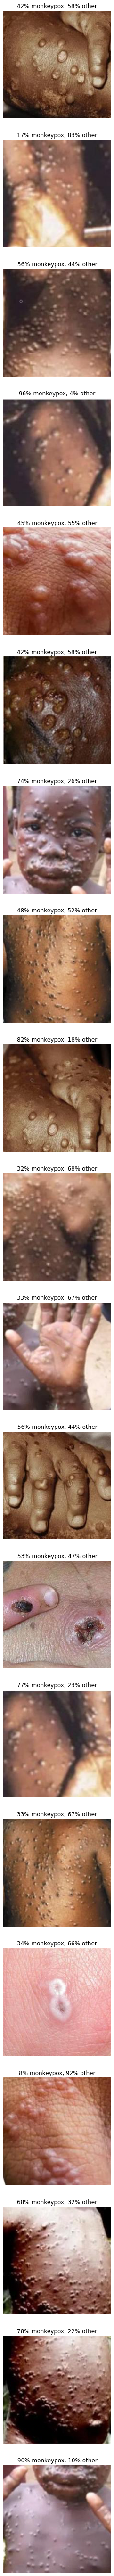

In [27]:
fig, axs = plt.subplots(len(mon_list), 1, figsize=(150, 100))
for i, img in enumerate(mon_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)
    print(100*pred_probs[i,0],100*pred_probs[i,1])

96.1670458316803 3.8329511880874634
30.973610281944275 69.02638673782349
54.95716333389282 45.0428307056427
25.43327808380127 74.56671595573425
63.00564408302307 36.99435591697693
34.530723094940186 65.46927094459534
75.99804401397705 24.00195449590683
45.72773277759552 54.27226424217224
77.13346481323242 22.86653369665146
23.867811262607574 76.13218426704407
25.43468475341797 74.56532120704651
39.73507881164551 60.26492118835449
13.904081284999847 86.09592318534851
62.40672469139099 37.593284249305725
13.35146576166153 86.64854168891907
89.39269781112671 10.607301443815231
43.7303900718689 56.2696099281311
22.997355461120605 77.0026445388794
62.52807974815369 37.47192323207855
49.66973960399628 50.33026933670044
79.65660095214844 20.343396067619324
38.486248254776 61.51375770568848
97.82045483589172 2.179538831114769
33.59074294567108 66.4092481136322
53.570687770843506 46.42931520938873


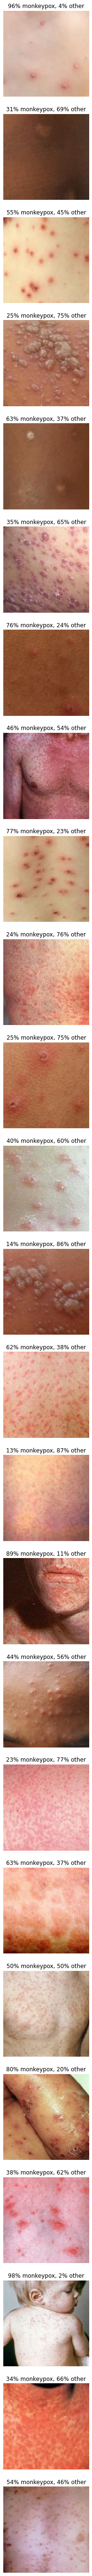

In [28]:
fig, axs = plt.subplots(len(oth_list), 1, figsize=(150, 100))
for i, img in enumerate(oth_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs2[i,0],
                                                            100*pred_probs2[i,1]))
    ax.imshow(img)
    print(100*pred_probs2[i,0],100*pred_probs2[i,1])